In [15]:
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt

au = c.au.cgs.value
MS = c.M_sun.cgs.value
RS = c.R_sun.cgs.value
pc = c.M_sun.cgs.value
kb = c.k_B.cgs.value
mu = 2.3
mp = c.m_p.cgs.value
G  = c.G.cgs.value

plt.style.use('serif_style')

In [2]:
def Rcore(Mcore):
    return G*Mcore/(2*cs**2)

def calc_Omega(rnew):
    '''
    Function that calculates a new Omega such that as you scale the cloud mass and radius,
    the specific angular momentum follows the J-R relation from e.g. Chen et al. 2019.
            j \propto r^(1.5)

    Meaning:
            / rnew \^1.5     / jnew \
           | ------ |   =   | ------ |
            \ rold /         \ jold /

    Returns:
    Omega_new : float
                Rotation rate of the molecular core, scaled to Kees' values.
    '''
    rold = Rcore_std
    jold = Omega_std**2 * rold
    jnew = jold * (rnew/rold)**(1.5)
    Omega_new = np.sqrt(jnew / rnew)
    return Omega_new

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_21490/3090326259.py:8: SyntaxWarning: invalid escape sequence '\p'
  j \propto r^(1.5)


In [3]:
# Cloud masses
T = 10
cs = np.sqrt(kb * T / (mu * mp))

N = 128
M = np.geomspace(0.5, 1.5, N) * MS
R = G*M/(2*cs**2)

# Kees' 1 MS model as a baseline
Omega_std = 7e-15
Rcore_std = Rcore(1*MS)

Omega = calc_Omega(R)

# The breakup rotation speed
Omega_brk = 2*np.sqrt(2) * cs**3 / (G*M)
R_centrf = Omega**2 * R**4 / (G*M)

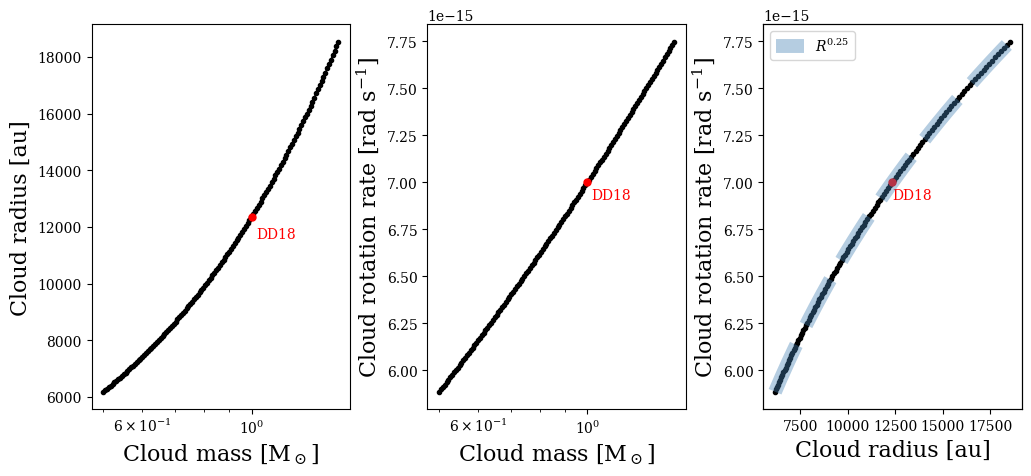

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))
# Radius VS mass
ax[0].semilogx(M/MS, R/au, 'k.-', lw=1)
ax[0].plot(1, Rcore_std/au, 'ro', markersize=5)
ax[0].text(1.02, Rcore_std/au*0.95, 'DD18', color='red', va='center')

# Omega VS Mass
ax[1].semilogx(M/MS, Omega, 'k.-', lw=1)
ax[1].plot(1., Omega_std, 'ro', markersize=5)
ax[1].text(1.02, Omega_std*0.99, 'DD18', color='red', va='center')

ax[2].plot(R/au, Omega, 'k.-', lw=1)
ax_JR = ax[2].twinx()
ax[2].plot(Rcore_std/au, Omega_std, 'ro', markersize=5)
ax[2].text(Rcore_std/au, Omega_std*0.99, 'DD18', color='red', va='center')
# Anayltical relation (Which we use)
ax_JR.plot(R/au, (R/au)**0.25, '--', color='steelblue', label=r'$R^{0.25}$', alpha=0.4, zorder=-1, lw=10)

ax_JR.legend()
ax_JR.set_yticks([])

ax[0].set_ylabel(r'Cloud radius [au]')
ax[2].set_ylabel(r'Cloud radius [au]')
ax[0].set_xlabel(r'Cloud mass [M$_\odot$]')
ax[1].set_xlabel(r'Cloud mass [M$_\odot$]')
ax[1].set_ylabel(r'Cloud rotation rate [rad s$^{-1}$]')
ax[2].set_ylabel(r'Cloud rotation rate [rad s$^{-1}$]')
ax[2].set_xlabel(r'Cloud radius [au]')

xticks = np.array([0.6, 0.8, 1, 1.2, 1.5])
# [axis.set_xticks(xticks, np.astype(xticks, str)) for axis in ax[:2]]

fig.subplots_adjust(wspace=0.3)

In [27]:
stars = np.load('DD-diskevol-stellar-properties.npz')
mvals = stars['M'] * MS
rvals = Rcore(mvals)
ovals = calc_Omega(rvals)
# Stellar properties - teff and radius
star_tvals = stars['T']
star_rvals = stars['R'] * RS

# N_out = 10
# idx = int(N/N_out)
# rvals_temp = R[::idx]
# mvals_temp = M[::idx]
# ovals_temp = Omega[::idx]

# rvals = np.zeros((len(rvals_temp)+2))
# mvals = np.zeros_like(rvals)
# ovals = np.zeros_like(rvals)

# M0 = 0.1*MS
# M1 = 0.3*MS
# for i, Mass in enumerate([M0, M1]):
#     rvals[i] = Rcore(Mass)
#     mvals[i] = Mass
#     ovals[i] = calc_Omega(Rcore(Mass))
# rvals[2:] = rvals_temp
# mvals[2:] = mvals_temp
# ovals[2:] = ovals_temp

# Need to injet values for 0.1 and 0.3 Msun

for i, (r, m, o, rstar, tstar) in enumerate(zip(rvals, mvals, ovals, star_rvals, star_tvals)):
    print(f'N={i+1}\nValues:\n\tM={m/MS}\n\tR={r/au}\n\tOmega={o}\n\tR*={rstar/RS}\n\tTeff={tstar}\n------------')



N=1
Values:
	M=0.1
	R=1235.943348474186
	Omega=3.936389276332445e-15
	R*=0.416
	Teff=3050.0
------------
N=2
Values:
	M=0.3
	R=3707.830045422558
	Omega=5.180579631445997e-15
	R*=0.713
	Teff=3363.0
------------
N=3
Values:
	M=0.5
	R=6179.71674237093
	Omega=5.886274906776003e-15
	R*=0.88
	Teff=3651.0
------------
N=4
Values:
	M=0.8
	R=9887.546787793488
	Omega=6.620191263022232e-15
	R*=1.064
	Teff=4041.0
------------
N=5
Values:
	M=1.0
	R=12359.43348474186
	Omega=7.000000000000001e-15
	R*=1.189
	Teff=4363.0
------------
N=6
Values:
	M=1.2
	R=14831.320181690233
	Omega=7.32644597574474e-15
	R*=1.347
	Teff=4768.0
------------
N=7
Values:
	M=1.4
	R=17303.206878638604
	Omega=7.614301141560942e-15
	R*=1.63
	Teff=5392.0
------------


In [ ]:
# Make the parameter files

str_1st = '''\
number_of_radial_zones                    1400
gas_to_dust                               100.
flaring_angle                             0.05
background_temperature                    10.
'''
# Omega value goes here
str_2nd = '''\
viscous_alpha                             1.d-3
dust_alpha                                1.d-5
'''
# Mass value goes here
# Save location goes here

folders = []

for i, (m, o, rstar, tstar) in enumerate(zip(mvals, ovals, star_rvals, star_tvals)):
    mass = f'{m/MS:.2f}'
    omega = f'{o:.2e}'
    parameter_file_name = f'{mass}_{omega}.par'

    stellar_evol = True
    if stellar_evol:
        save_location = f'stellar_evol/{mass}_{omega}'
    else:
        save_location = f'{mass}_{omega}'
    folders.append(save_location)

    # Format the values to save
    omega = f'{o:.4e}'.split('e')
    omega_val = omega[0]+'d'+omega[1]   # Convert to fortran format
    mass_val = f'{m/MS:.4f}'

    omega_str      = f'cloud_omega                               {omega_val}'
    mass_str       = f'cloud_mass                                {mass_val}'
    mass_str       = f'cloud_mass                                {mass_val}'
    tstar_str      = f'star_temperature                          {tstar}'
    rstar_str      = f'star_radius                               {rstar/RS}'
    save_str       = f'save_location                             {save_location}'
    str = str_1st + omega_str + '\n' + str_2nd + mass_str + '\n' + tstar_str + '\n' + rstar_str + '\n' + save_str + '\n'     # Append into a parameter file string

    with open('parameter_files/'+parameter_file_name, 'w', encoding='utf-8') as f:
        f.write(str)

# Save all the data folder names into a file to mkdir with them later
with open('folders.info', 'w', encoding='utf-8') as f: 
    for folder in folders:
        f.write(folder+'\n')

# Tests
with open('folders.info', 'r') as f:
    content = f.readlines()
    print(content)

['stellar_evol/0.10_3.94e-15\n', 'stellar_evol/0.30_5.18e-15\n', 'stellar_evol/0.50_5.89e-15\n', 'stellar_evol/0.80_6.62e-15\n', 'stellar_evol/1.00_7.00e-15\n', 'stellar_evol/1.20_7.33e-15\n', 'stellar_evol/1.40_7.61e-15\n']


TypeError: data type 'number_of_radial_zones                    1400\ngas_to_dust                               100.\nflaring_angle                             0.05\nbackground_temperature                    10.\ncloud_omega                               7.6304d-15\nviscous_alpha                             1.d-3\ndust_alpha                                1.d-5\ncloud_mass                                1.4119\nsave_location                             1.41_7.63e-15\n' not understood

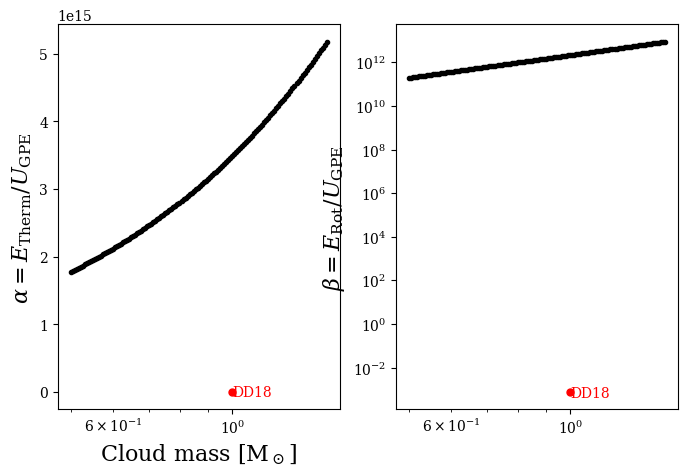

In [7]:
# GPE  = (3/5) * G * M**2 / R
GPE = 4 * cs**4 / G * np.log(R) - np.log(1e-10)
TE   = (3/2) * M/(mu*mp) * kb * T
I    = (2/5) * M * R**2  # Solid sphere moment of inertia
Erot = 1/2 * I * Omega**2

TE_DD = (3/2) * MS/(mu*mp) * kb * T
GPE_DD = (3/5) * G * MS**2 / Rcore(MS)
I_DD = (2/5) * MS * Rcore(MS)**2
Erot_DD = 1/2 * I_DD * Omega_std**2

alpha = TE / GPE
beta = Erot / GPE

alpha_DD = TE_DD / GPE_DD
beta_DD = Erot_DD / GPE_DD

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8, 5))

ax[0].semilogx(M/MS, alpha, 'k.-', lw=1)
ax[0].plot(1, alpha_DD, 'ro', markersize=5)
ax[0].text(1, alpha_DD-0.005, 'DD18', color='red', va='center')
ax[0].set_ylabel(r'$\alpha=E_{\rm{Therm}}/U_{\rm{GPE}}$')
ax[0].set_xlabel(r'Cloud mass [M$_\odot$]')

ax[1].loglog(M/MS, beta, 'k.-', lw=1)
ax[1].plot(1, beta_DD, 'ro', markersize=5)
ax[1].text(1, beta_DD*0.9, 'DD18', color='red', va='center')
ax[1].set_ylabel(r'$\beta=E_{\rm{Rot}}/U_{\rm{GPE}}$')

[axis.set_xticks(xticks, np.astype(xticks, str)) for axis in ax]
fig.subplots_adjust(wspace=0.4)